# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [79]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import re
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [80]:
#check for unique values in Mouse ID column in both dataframes
mouse_metadata["Mouse ID"].unique
study_results["Mouse ID"].unique

<bound method Series.unique of 0       b128
1       f932
2       g107
3       a457
4       c819
        ... 
1888    r944
1889    u364
1890    p438
1891    x773
1892    b879
Name: Mouse ID, Length: 1893, dtype: object>

In [81]:
# Combine the data into a single dataset
merged_study = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
merged_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [82]:
# Checking the number of mice.
len(merged_study["Mouse ID"].unique())

249

In [83]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupmouse = merged_study.loc[merged_study.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dupmouse

array(['g989'], dtype=object)

In [84]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_study = merged_study[merged_study['Mouse ID'].isin(dupmouse)==False]
clean_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [85]:
# Checking the number of mice in the clean DataFrame.
clean_study["Mouse ID"].nunique()

248

## Summary Statistics

In [86]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summarystats = clean_study.groupby("Drug Regimen").aggregate({
    "Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']})
summarydf = pd.DataFrame(summarystats)
summarydf

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [87]:
#RENAME COLUMNS
summarydf = summarydf.rename(columns={
    "mean": "Mean Tumor Volume",
    "median": "Median Tumor Volume",
    "var": "Tumor Volume Variance",
    "std": "Tumor Volume Std. Dev.",
    "sem": "Tumor Volume Std. Err."})
summarydf

Tumor Volume (mm3)                                            \
              Mean Tumor Volume Median Tumor Volume Tumor Volume Variance   
Drug Regimen                                                                
Capomulin             40.675741           41.557809             24.947764   
Ceftamin              52.591172           51.776157             39.290177   
Infubinol             52.884795           51.820584             43.128684   
Ketapril              55.235638           53.698743             68.553577   
Naftisol              54.331565           52.509285             66.173479   
Placebo               54.033581           52.288934             61.168083   
Propriva              52.320930           50.446266             43.852013   
Ramicane              40.216745           40.673236             23.486704   
Stelasyn              54.233149           52.431737             59.450562   
Zoniferol             53.236507           51.818479             48.533355   

                                                            
             Tumor Volume Std. Dev. Tumor Volume Std. Err.  
Drug Regimen                                                
Capomulin                  4.994774               0.329346  
Ceftamin                   6.268188               0.469821  
Infubinol                  6.567243               0.492236  
Ketapril                   8.279709               0.603860  
Naftisol                   8.134708               0.596466  
Placebo                    7.821003               0.581331  
Propriva                   6.622085               0.544332  
Ramicane                   4.846308               0.320955  
Stelasyn                   7.710419               0.573111  
Zoniferol                  6.966589               0.516398

In [88]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drugstats = clean_study.groupby("Drug Regimen")
drugstats_mean = drugstats['Tumor Volume (mm3)'].mean()
drugstats_median = drugstats['Tumor Volume (mm3)'].median()
drugstats_var = drugstats['Tumor Volume (mm3)'].var()
drugstats_std = drugstats['Tumor Volume (mm3)'].std()
drugstats_sem = drugstats['Tumor Volume (mm3)'].sem()
fulldrugstats = pd.DataFrame({'Mean Tumor Volume': drugstats_mean, 
                              'Median Tumor Volume': drugstats_median,
                             'Tumor Volume Variance': drugstats_var,
                             'Tumor Volume Std Dev': drugstats_std,
                             'Tumor Volume Std Err': drugstats_sem})
fulldrugstats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

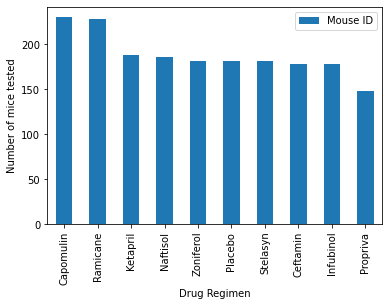

In [89]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
nmicetestedpy = clean_study.groupby("Drug Regimen").agg({"Mouse ID": "count"}).sort_values("Mouse ID", ascending=False)
nmicetesteddf = pd.DataFrame(nmicetestedpy)
nmicetestedbar = nmicetesteddf.plot.bar()
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice tested")
plt.show()

TypeError: only size-1 arrays can be converted to Python scalars

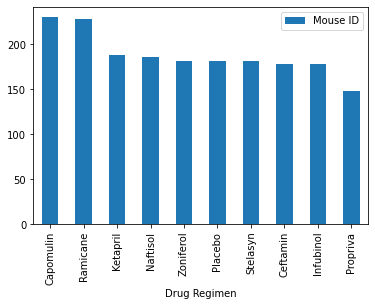

In [90]:
#
#
#
#
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# labels = ["Drug Regimen", "Number of Mice Tested"]
nmicetesteddf.plot.bar(label=labels)
xaxis = nmicetestedpy.index
plt.bar(xaxis, nmicetestedpy, align = "center")
plt.xticks(rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice tested")
plt.show()

# type(nmicetesteddf)

<function matplotlib.pyplot.show(*args, **kw)>

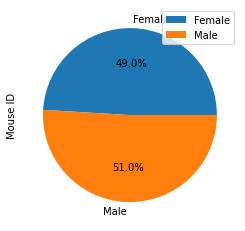

In [91]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
malefemale = clean_study.groupby("Sex").agg({"Mouse ID": "count"})
malefemale.plot(kind='pie', autopct="%1.1f%%", subplots=True)
plt.show

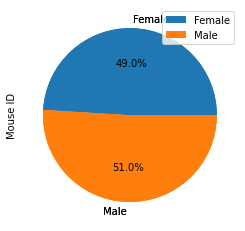

In [92]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#IS THIS THE RIGHT METHOD: PYPLOT?
malefemale.plot.pie(subplots=True)
dist = malefemale["Mouse ID"]
sex = malefemale.index
plt.pie(dist, labels=sex, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [93]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
finaltvol = clean_study.groupby(["Mouse ID"])['Timepoint'].max().reset_index()
finaltvol

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mergeddata = finaltvol.merge(clean_study,on=['Mouse ID','Timepoint'],how="left")
mergeddata.head(20)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
5,a401,45,66.794156,4,Zoniferol,Female,8,25
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
8,a457,10,49.783419,0,Ketapril,Female,11,30
9,a492,45,60.122011,1,Stelasyn,Male,20,25


In [94]:
#make list of unique drugs
listofdrugs = mergeddata["Drug Regimen"].unique()
listofdrugs

array(['Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol',
       'Ramicane', 'Ketapril', 'Propriva', 'Naftisol', 'Capomulin'],
      dtype=object)

In [95]:
listofdrugs = ["Ceftamin", "Ramicane", "Infubinol", "Capomulin"]
tvollist = []

# Put treatments into a list for for loop (and later for plot labels)
for drug in listofdrugs:
    finaltumorvol = mergeddata.loc[mergeddata["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    tvollist.append(finaltumorvol)
tvollist


[3      62.999356
 21     45.000000
 22     56.057749
 25     55.742829
 58     48.722078
 75     47.784682
 88     61.849023
 94     68.923185
 106    67.748662
 107    57.918381
 109    46.784535
 110    59.851956
 113    64.299830
 134    59.741901
 150    61.433892
 154    64.192341
 184    45.000000
 188    52.925348
 189    45.000000
 209    67.527482
 223    45.000000
 228    64.634949
 231    61.386660
 238    68.594745
 240    64.729837
 Name: Tumor Volume (mm3), dtype: float64,
 6      38.407618
 7      43.047543
 10     38.810366
 12     32.978522
 33     38.342008
 37     33.397653
 45     37.311236
 52     40.659006
 70     29.128472
 76     33.562402
 77     36.374510
 91     31.560470
 93     36.134852
 96     22.050126
 119    30.564625
 126    31.095335
 157    45.220869
 158    36.561652
 166    37.225650
 168    43.419381
 177    30.276232
 190    40.667713
 217    43.166373
 235    44.183451
 244    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0      67.973

In [96]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for series in tvollist:
    quartiles = series.quantile([0.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(series[(series < lower_bound) | (series > upper_bound)])

Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


C:\Users\clara\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


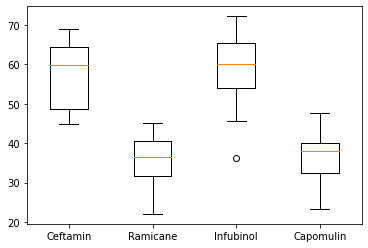

In [97]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.boxplot(tvollist)
ax1.set_xticklabels(listofdrugs)
fig1.show()

## Line and Scatter Plots

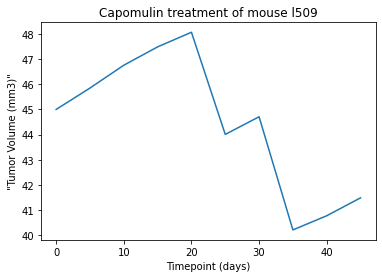

In [98]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capmouse = clean_study.loc[clean_study["Mouse ID"] == "l509"]
capmouse2 = capmouse[["Timepoint", "Tumor Volume (mm3)"]].set_index("Timepoint")
plt.plot(capmouse2)
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('"Tumor Volume (mm3)"')
plt.show()

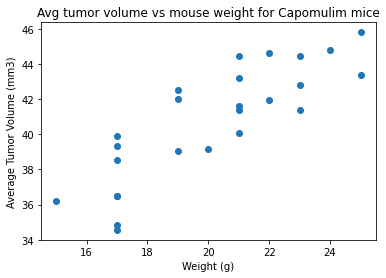

In [99]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capvolwei = clean_study.loc[clean_study["Drug Regimen"] == "Capomulin"].sort_values("Mouse ID")
capvolwei = capvolwei.groupby("Mouse ID").agg({"Tumor Volume (mm3)": "mean", "Weight (g)": "first"})

plt.scatter(capvolwei["Weight (g)"], capvolwei["Tumor Volume (mm3)"])
plt.title('Avg tumor volume vs mouse weight for Capomulim mice')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [100]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = capvolwei.iloc[:,1]
tumorvol = capvolwei.iloc[:,0]
correlation = st.pearsonr(weight,tumorvol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


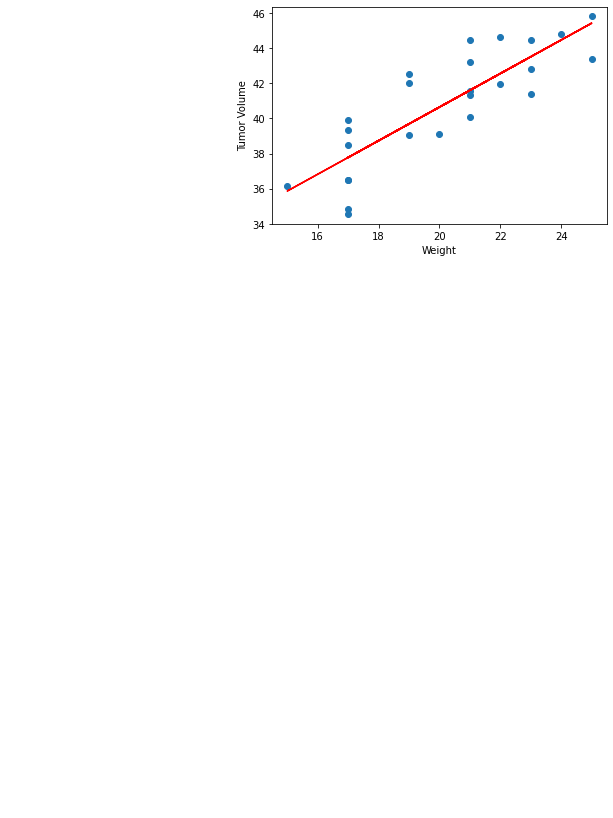

In [101]:
x_values = weight
y_values = tumorvol

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15, color="red")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.show()